In [1]:
import turicreate as tc

# Primeiro, carregamos o database.

In [2]:
vendas = tc.SFrame(('home_data.sframe'))
vendas['ind'] = [x for x in range(0,vendas.num_rows())]

In [3]:
vendas

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


# Um gráfico demonstrando a área da casa pelo seu preço:

In [4]:
tc.show(vendas[1:5000]['sqft_living'],vendas[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Antes de tudo, queremos criar um modelo que, com certa precisão, preveja o preço de uma casa com base em informações prévias. Para isso, precisamos:

* Separamos o database em 'teste' e 'treino' (para evitar o 'overfitting'). Vamos usar 80% dos dados para treino e 20% para teste.

* Iremos separar quais informações nosso modelo terá acesso. Quanto mais informações, maior a dimensão da regressão. As informações devem ser selecionadas de modo que efetivamente possam ter alguma influência no preço, caso contrário é muito provável que diminua a precisão. Ex: O ID da casa nada tem a ver com o preço, o que significa que 'alimenta-lo' ao modelo não pode trazer nenhuma vantagem.

* Criar o modelo com base nos dados de treino.

In [5]:
dataTreino,dataTest = vendas.random_split(0.8,seed = 314)

# Para efeitos de demonstração, criaremos dois modelos:

* 1º - Nosso modelo recebe apenas a área da casa como informação.
* 2º - Nosso modelo recebe diversas informações diferentes sobre cada casa.

In [6]:
infoBasica = ['sqft_living']
infoAvanc = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', 
'grade', 
'waterfront', 
'view', 
'sqft_above', 
'sqft_basement', 
'yr_built',
'yr_renovated', 
'lat', 'long',
'sqft_living15', 
'sqft_lot15', 
]

In [7]:
modeloBasico = tc.linear_regression.create(dataTreino,target = 'price',features = infoBasica)
modeloAvanc = tc.linear_regression.create(dataTreino,target = 'price',features = infoAvanc)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16441

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.003559     | 4363518.999793     | 2248665.726344       | 260650.868836                   | 234434.180239                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16441

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.021897     | 4426870.491619     | 1270851.636799       | 157975.040034                   | 146545.539579                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Agora, vamos utilizar nossos dois modelos para 'prever' o preço de duas casas do nosso database, e comparar com o valor real.

In [8]:
house1 = dataTest[201]
house2 = dataTest[145]

In [9]:
print (house1['price'], house2['price'])
print (modeloBasico.predict(house1),modeloBasico.predict(house2))
print (modeloAvanc.predict(house1),modeloAvanc.predict(house2))

469500.0 328000.0
[789480.7078983682] [368720.7477151423]
[476072.31651455816] [246392.90392518556]


# Perceba que o modelo avançado, apesar de ter um erro parecido com o outro na primeira casa, tem uma precisão consideravelmente maior na segunda.

# Agora, vamos fazer dois gráficos de preço por área, um para cada modelo, e comparar os resultados.

* Bolas azuis : original.
* Traços laranjas : previsão do modelo.


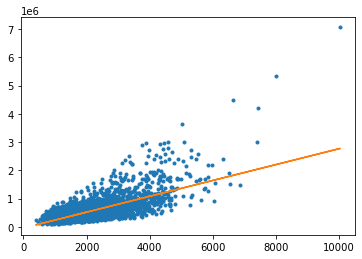

In [10]:
import matplotlib.pyplot as mpl
%matplotlib inline
mpl.plot(dataTest['sqft_living'],dataTest['price'],'.',
        dataTest['sqft_living'],modeloBasico.predict(dataTest),'-')

# Para o primeiro modelo, mais básico, o gráfico é uma linha, pois apenas o fator 'área' foi considerado na regressão.

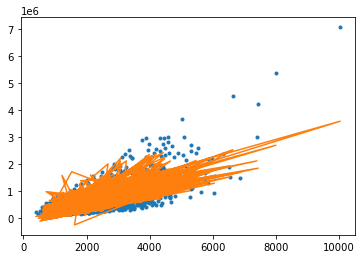

In [11]:
mpl.plot(dataTest['sqft_living'],dataTest['price'],'.',
        dataTest['sqft_living'],modeloAvanc.predict(dataTest),'-')

In [12]:
modeloAvanc.evaluate(dataTest)

{'max_error': 3481286.0249872217, 'rmse': 174662.80850757865}

# Já o segundo modelo, mais complexo e com mais dimensões, retorna um gráfico que,apesar de algumas disparidades, se assemelha bastante ao gráfico original, o que demonstra o poder da regressão.

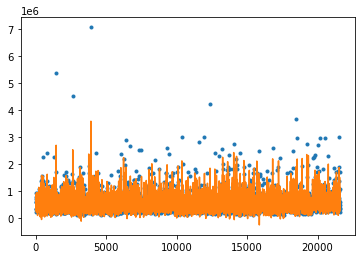

In [13]:
mpl.plot(dataTest['ind'],dataTest['price'],'.',
        dataTest['ind'],modeloAvanc.predict(dataTest),'-')

# Acima, uma demonstração do valor real de cada uma das casas e sua previsão. Perceba que o modelo se assemelha bastante ao gráfico original.